In [2]:
#### %matplotlib inline
from __future__ import division
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
%pylab inline
import os
import numpy as np
import pandas as pd
from networkx import grid_graph
from networkx import draw
import networkx as nx

Populating the interactive namespace from numpy and matplotlib


In [3]:
def dist(a, b):
    (x1, y1) = a
    (x2, y2) = b
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5

In [4]:
def initializeRandomHW(h, G, pos):
    nodes = list(G.nodes)
    for i in range(0, h.N):
        k = randint(0,len(G.nodes))
        h.home.append(nodes[k])
        k = randint(0,len(G.nodes))
        h.work.append(nodes[k])
    
    node_color='#A0CBE2'
    color_map = []
    for i in range(0, h.N):
        for node in G:
            if node == h.home[i]:
                color_map.append('blue')
            elif node == h.work[i]:
                color_map.append('red')  
            else:
                color_map.append(node_color)  
        nx.draw(G,pos,node_color = color_map,with_labels = True)
    return h


def drawShortestPath(G,h, edges, tmp, pos):
    #
    node_color='#A0CBE2'
    color_map = []
    for i in range(0, h.N):
        for node in G:
            if node == h.home[i]:
                color_map.append('blue')
            elif node == h.work[i]:
                color_map.append('red')  
            else:
                color_map.append(node_color)  
                
    c1 = 'black'
    c2 = 'red'
    colors = []
    width = []
    w1 = 1
    w2 = 4
    for j in edges:
        k = list(j)
        c = c1
        w = w1
        for i in range(0, len(tmp)-1):
            p = [tmp[i], tmp[i+1]]
            l = list(set(p) & set(k))
            if len(l) > 1:
                c = c2
                w = w2
        colors.append(c)
        width.append(w)
    nx.draw(G,pos,node_color = color_map,edge_color=colors,width=width,
            edge_cmap=plt.cm.Blues,
            with_labels=True)

In [5]:
s = 5
G = nx.grid_graph(dim=[s,s])
nodes = list(G.nodes)
edges = list(G.edges)
p = []
for i in range(0, s):
    for j in range(0, s):
        p.append([i,j])
for i in range(0, len(nodes)):
    G.node[nodes[i]]['pos'] = p[i]

pos = {}
for i in range(0, len(nodes)):
        pos[nodes[i]] = p[i]

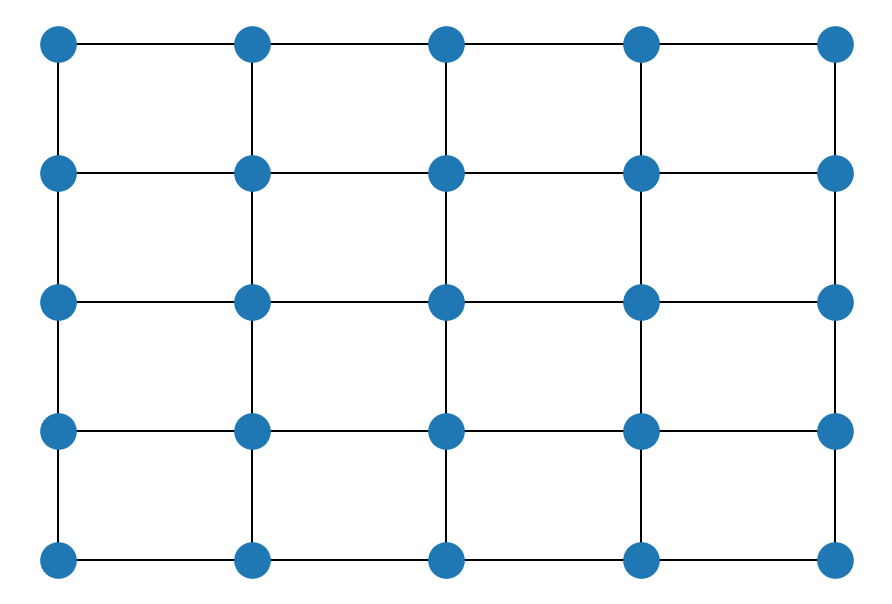

In [6]:
nx.draw(G, pos)

In [7]:
class humans:
    def __init__(self):
        self.N = []
        self.home = [];
        self.work = [];
        self.status = 0; ### 0=S, 1=E, 2=I, 3=R
        self.pathL = []

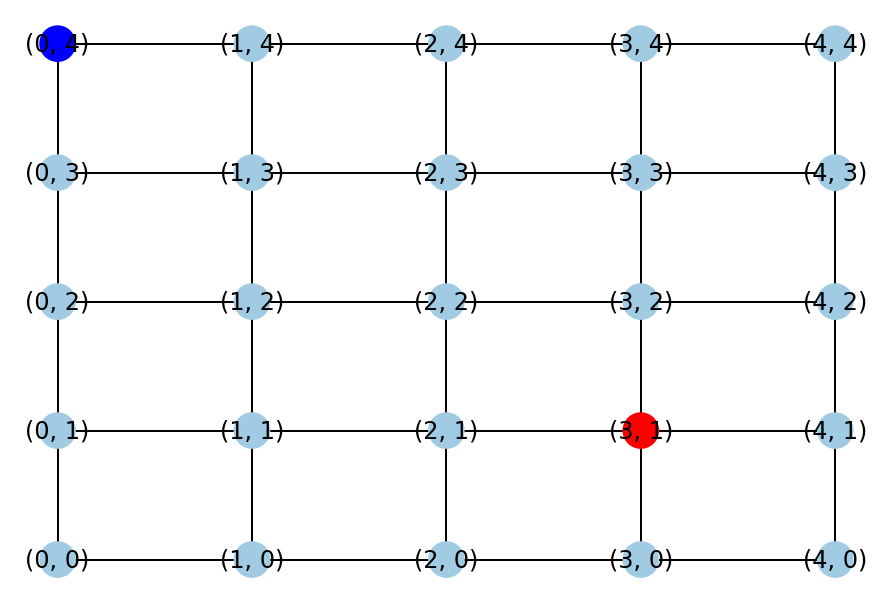

In [9]:
h = humans()
h.N = 1
h = initializeRandomHW(h, G, pos)

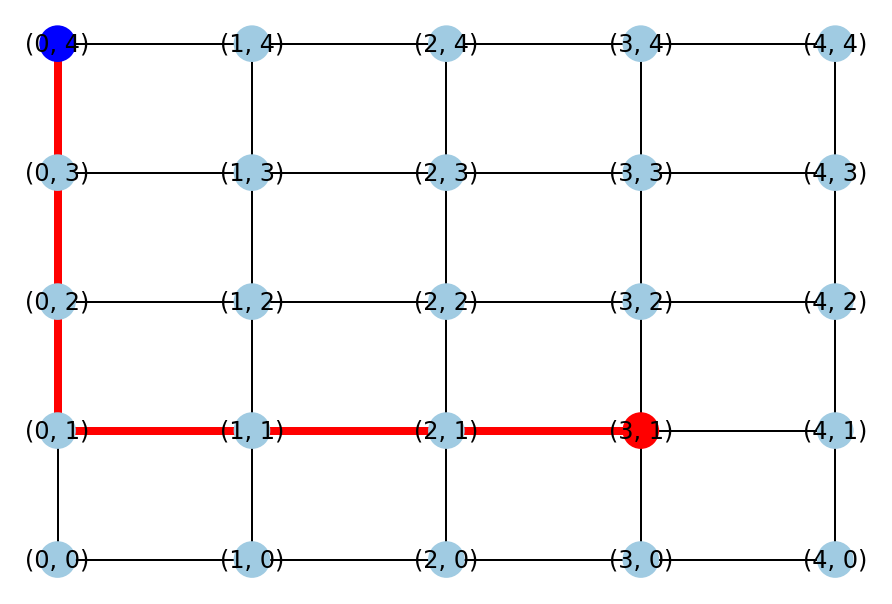

In [10]:
for i in edges:
    nodeA = i[0]
    nodeB = i[1]
    G[nodeA][nodeB]['weight'] = 0  ## assign weight 0 to the link

#path = nx.astar_path(G,h.home[0],h.work[0],dist)
path = nx.dijkstra_path(G,h.home[0],h.work[0])
drawShortestPath(G, h, edges, path, pos)

In [11]:
class cells:
    def __init__(self):
        self.V =  []   ## number of cells
        self.name = []
        self.Nm = {} ## number of mosquito
        self.Im = {}  

In [21]:
c = cells()
c.V = s*s
for i in range(0, c.V):
    c.name.append(nodes[i])
    c.Nm[nodes[i]] = randint(100,1000)  ## assign N mosquito between(100 and 1000)
    c.Im[nodes[i]] = randint(0,100)     ## assign I infected mosquito between (0 and 100)

In [24]:
G1 = G.copy()
for i in edges:
    nodeA = i[0]
    nodeB = i[1]
    G1[nodeA][nodeB]['weight'] = (c.Im[ nodeB ] / c.Nm[ nodeB ])*100  ## change the weight according to 
                                                                      ## the mosquito infected

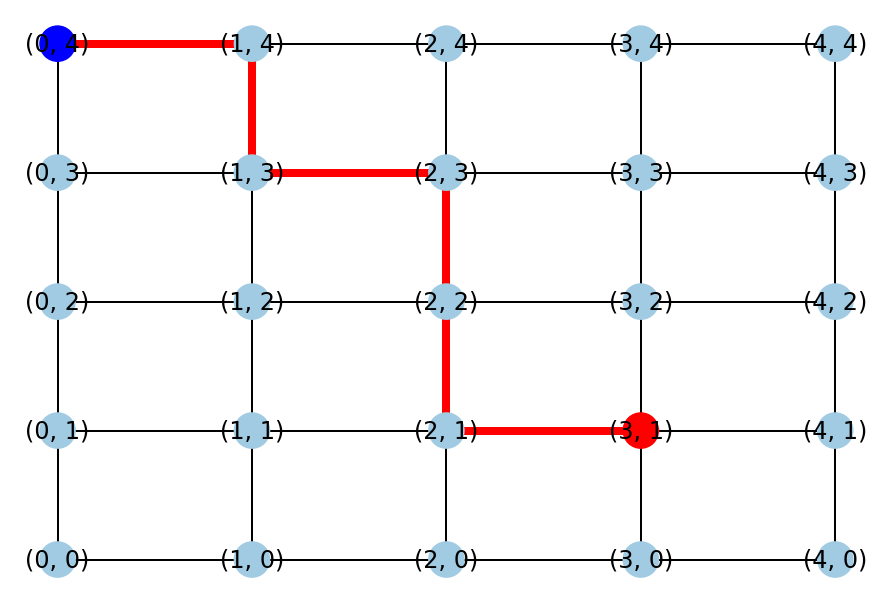

In [25]:
path1 = nx.dijkstra_path(G1,h.home[0],h.work[0])
drawShortestPath(G1, h, edges, path1, pos)

In [ ]:
xv = 0.1    ## mosquito per humans
br = 0.25   ## bite rate
#### HUMANS (rate of infection)
SE = 0.5    ## Humans: S ---> E
EI = 0.15   ## Humans: E ---> I
IR = 0.143  ## Humans: E ---> I
#### ADULT MOSQUIT (rate of infection and mortality rate)
SEm = 0.75  ## V: S->E
EIm = 0.1   ## V: E->I
MUv = 0.04  ## Probability to die for adult mosquito
### AQUATIC  (rate of transition aquatic to adult and mortality rate)
MUa = 0.04  ## Probability to die for acquatic mosquito
ASm = 0.04  
VA = 0.4    ## V: A->V

In [ ]:
class epidemics:
    def __init__(self):
        self.V = []  ## number of nodes
        self.N = [] ## Number of agents

        
    def nodesEpi():
        for i in range(0, len())